# 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード $t$ に対するジニ不純度 $I(t)$ は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。


#### ひとまず動く物が完成したので提出
#### 何か意見ございましたらよろしくお願いします。

In [610]:
class ScratchDecesionTreeClassifierDepth1():

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.gini_score = []
    
    # 問題3 学習 
    def fit(self, X, y):  
        # 閾値を設定する
        self.threshold_list = np.arange(0, 10, 0.1)
        self.threshold_index = [] 
        max_infomation_gain = 0
        
        # 問題1,2の内容をfor文で回して、gainの最大値を所得する
        # 特徴量分の値を所得する
        for i in range(len(self.threshold_list)):
            self._gini(X, y, 0, self.threshold_list[i]) 
            self._information_gain(y)
            
            # 最大値の更新と最大値のthresholdを保存する
            if  max_infomation_gain < self._information_gain(y):
                max_infomation_gain = self._information_gain(y)
                self.threshold_index.append(i)
                
            if self.verbose:
                # verboseをTrueにした際は学習過程を出力
                print("{}/{}, max_inofomation_gain{}".format(i+1, len(self.threshold_list), max_infomation_gain))
        
        # 情報利得の最大化のthresholdを代入
        self._gini(X, y, 0, self.threshold_list[-1])
       
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        # fitで求めた閾値より下回った物をpredに決定させる
        pred = np.where(X[:, 0] < self.threshold_list[self.threshold_index[-1]], 0, 1)
        return pred
    
    # 問題1の計算式
    def _gini(self, X, y, feature_index, threshold):
        '''
        K： クラスの数
        node_index：ノードのインデックス
        div_target：ノード内にあるクラスのインデックスを表示可能
        node_t_samples：ノードの特定のクラス（0,1,2）に対するサンプル数
        node_all_samples：ノードの全てのサンプル数
        '''
    # 閾値を設けてノードに分割する(ノード1,2)
        div_target = [y[X[:, feature_index] <= threshold], y[X[:, feature_index] > threshold]] 
    
    # 出力された２つのノードをgroupに入れる  
    # 参照URL：https://hktech.hatenablog.com/entry/2018/10/05/004235
        for group in div_target:
            sum_impure = 0
            self.node_all_samples = len(group)
            classes = np.unique(group)
        
        # 分割されたノードの中のクラスを計測してジニ係数を求める
            for cls in classes:
                node_t_samples = len(group[group == cls])
                impure = (node_t_samples/self.node_all_samples)**2
                sum_impure += impure
            self.gini = 1 - sum_impure
            self.gini_score.append(self.gini) 
        return self.gini

    # 問題2の親のノードのgini係数
    def _parent(self,X, y):
        K = np.unique(y)
        N_t_samples = y.shape[0]/K.size
        N_t_all_samples = len(y)
        parent_gini = 1 - (N_t_samples/N_t_all_samples)**2*K.size
        return parent_gini 
    
    # 問題2のゲインの最大化の式
    def _information_gain(self, y):
        information_gain = self._parent(X,y) - ((self.node_all_samples/len(y))*self.gini_score[0])\
-(self.node_all_samples/len(y))*self.gini_score[1]
        return information_gain
    

In [561]:
# 問題1の計算過程を記載したもの
def gini(X, y, feature_index, threshold):
    # 分割したノードの種類(ノード１、２、３)
    div_target = [y[X[:, feature_index] <= threshold],y[X[:, feature_index] >threshold]]
    
    gini_score = []
    
    # ノードをgroupに入れる 
    for group in div_target:
        sum_impure = 0
        node_all_samples = len(group)
        #print("node_all_samples", node_all_samples)
        classes = np.unique(group)
        
        for cls in classes:
            node_t_samples = len(group[group == cls])
            impure = (node_t_samples/node_all_samples)**2 # ２乗の式
            sum_impure += impure #同じノード内の足し算
            #print(sum_impure)
        gini = 1 - sum_impure
        print(gini)
        gini_score.append(gini)
    return gini ,gini_score
    
threshold_list = [-10,-9]
gini(X, y, feature_index=0, threshold=-10)

1
0.5


(0.5, [1, 0.5])

In [605]:
'''
# WEBの手本

def gini_score(data, target, feat_idx, threshold):
    gini = 0
    sample_num = len(target)
   
    div_target = [target[data[:, feat_idx] >= threshold], target[data[:, feat_idx] < threshold]]
    #print(div_target)
    for group in div_target:
        print(group)
        score = 0
        classes = np.unique(group)
        for cls in classes:
            p = np.sum(group == cls)/len(group)
            score += p * p
        gini += (1- score) * (len(group)/sample_num)
    return gini

print(gini_score(X,y,1,2))
target = y[X[:, 0] <= 3]
print(target)
y[[target] == 0]
X.shape, y.shape
X_train.shape, y_train.shape
'''

'\n# WEBの手本\n\ndef gini_score(data, target, feat_idx, threshold):\n    gini = 0\n    sample_num = len(target)\n   \n    div_target = [target[data[:, feat_idx] >= threshold], target[data[:, feat_idx] < threshold]]\n    #print(div_target)\n    for group in div_target:\n        print(group)\n        score = 0\n        classes = np.unique(group)\n        for cls in classes:\n            p = np.sum(group == cls)/len(group)\n            score += p * p\n        gini += (1- score) * (len(group)/sample_num)\n    return gini\n\nprint(gini_score(X,y,1,2))\ntarget = y[X[:, 0] <= 3]\nprint(target)\ny[[target] == 0]\nX.shape, y.shape\nX_train.shape, y_train.shape\n'

In [563]:
'''
# 検討した内容
feature_index = 0
threshold = 2
threshold2 = 5

# node_indexが1の場合
#[node_index1 for node_index1 in X if X[:, 0] >= 2 and X[:, 0] < 3]
        
#node_indexが2の場合
#[node_index2 for node_index2 in X if X[:, 0] >= 3 and X[:, 0] <= 5]
        
#node_indexが3の場合
#[node_index3 for node_index3 in X if X[:, 0] > 5]
'''

'\nfeature_index = 0\nthreshold = 2\nthreshold2 = 5\n\n# node_indexが1の場合\n#[node_index1 for node_index1 in X if X[:, 0] >= 2 and X[:, 0] < 3]\n        \n#node_indexが2の場合\n#[node_index2 for node_index2 in X if X[:, 0] >= 3 and X[:, 0] <= 5]\n        \n#node_indexが3の場合\n#[node_index3 for node_index3 in X if X[:, 0] > 5]\n'

In [606]:
# 問題2 親ノードのジニ係数を所得する
import numpy as np

def parent(X, y):
    # t = t(1,2,3)
    K = np.unique(y)
    N_t_samples = y.shape[0]/K.size
    N_t_all_samples = len(y)
    gini = 1 - (N_t_samples/N_t_all_samples)**2*K.size
    return gini

parent(X,y)

0.5

In [607]:
#データセット2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

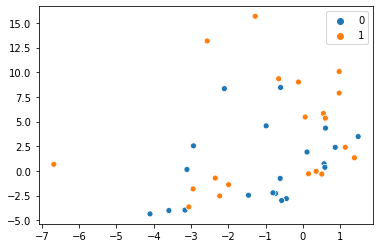

In [609]:
# データの可視化
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

#iris = load_iris()
#X = iris.data[:, 2:][0:100]
#y = iris.target[0:100]

sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.show()

df = np.concatenate([X,y[:, np.newaxis]], axis=1)




# 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 $I(t)$ を計算する関数を呼び出して使います。情報利得$IG$は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。



In [ ]:
def _information_gain(self, y):
        information_gain = self._parent(X,y) - ((self.node_all_samples/len(y))*self.gini_score[0])\
-(self.node_all_samples/len(y))*self.gini_score[1]
        return information_gain

# 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。


《組み合わせの取り方》


全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


《補足》


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 $I(p)$ は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。





In [611]:
def fit(self, X, y):  
        # 閾値を設定する
        self.threshold_list = np.arange(0, 10, 0.1)
        self.threshold_index = [] 
        max_infomation_gain = 0
        
        # 問題1,2の内容をfor文で回して、gainの最大値を所得する
        # 特徴量分の値を所得する
        for i in range(len(self.threshold_list)):
            self._gini(X, y, 0, self.threshold_list[i]) 
            self._information_gain(y)
            
            # 最大値の更新と最大値のthresholdを保存する
            if  max_infomation_gain < self._information_gain(y):
                max_infomation_gain = self._information_gain(y)
                self.threshold_index.append(i)
                
            if self.verbose:
                # verboseをTrueにした際は学習過程を出力
                print("{}/{}, max_inofomation_gain{}".format(i+1, len(self.threshold_list), max_infomation_gain))
        
        # 情報利得の最大化のthresholdを代入
        self._gini(X, y, 0, self.threshold_list[-1])

# 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。


In [ ]:
def predict(self, X):
    """
    決定木分類器を使いラベルを推定する
    """
    # fitで求めた閾値より下回った物をpredに決定させる
    pred = np.where(X[:, 0] < self.threshold_list[self.threshold_index[-1]], 0, 1)
    return pred

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。


In [595]:
class ScratchDecesionTreeClassifierDepth1():

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.gini_score = []
    
    # 問題3 学習 
    def fit(self, X, y):  
        # 閾値を設定する
        self.threshold_list = np.arange(0, 10, 0.1)
        self.threshold_index = [] 
        max_infomation_gain = 0
        
        # 問題1,2の内容をfor文で回して、gainの最大値を所得する
        # 特徴量分の値を所得する
        for i in range(len(self.threshold_list)):
            self._gini(X, y, 0, self.threshold_list[i]) 
            self._information_gain(y)
            
            # 最大値の更新と最大値のthresholdを保存する
            if  max_infomation_gain < self._information_gain(y):
                max_infomation_gain = self._information_gain(y)
                self.threshold_index.append(i)
                
            if self.verbose:
                # verboseをTrueにした際は学習過程を出力
                print("{}/{}, max_inofomation_gain{}".format(i+1, len(self.threshold_list), max_infomation_gain))
        
        # 情報利得の最大化のthresholdを代入
        self._gini(X, y, 0, self.threshold_list[-1])
       
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        # fitで求めた閾値より下回った物をpredに決定させる
        pred = np.where(X[:, 0] < self.threshold_list[self.threshold_index[-1]], 0, 1)
        return pred
    
    # 問題1の計算式
    def _gini(self, X, y, feature_index, threshold):
        '''
        K： クラスの数
        node_index：ノードのインデックス
        div_target：ノード内にあるクラスのインデックスを表示可能
        node_t_samples：ノードの特定のクラス（0,1,2）に対するサンプル数
        node_all_samples：ノードの全てのサンプル数
        '''
    # 閾値を設けてノードに分割する(ノード1,2)
        div_target = [y[X[:, feature_index] <= threshold], y[X[:, feature_index] > threshold]] 
    
    # 出力された２つのノードをgroupに入れる  
    # 参照URL：https://hktech.hatenablog.com/entry/2018/10/05/004235
        for group in div_target:
            sum_impure = 0
            self.node_all_samples = len(group)
            classes = np.unique(group)
        
        # 分割されたノードの中のクラスを計測してジニ係数を求める
            for cls in classes:
                node_t_samples = len(group[group == cls])
                impure = (node_t_samples/self.node_all_samples)**2
                sum_impure += impure
            self.gini = 1 - sum_impure
            self.gini_score.append(self.gini) 
        return self.gini

    # 問題2の親のノードのgini係数
    def _parent(self,X, y):
        K = np.unique(y)
        N_t_samples = y.shape[0]/K.size
        N_t_all_samples = len(y)
        parent_gini = 1 - (N_t_samples/N_t_all_samples)**2*K.size
        return parent_gini 
    
    # 問題2のゲインの最大化の式
    def _information_gain(self, y):
        information_gain = self._parent(X,y) - ((self.node_all_samples/len(y))*self.gini_score[0])\
-(self.node_all_samples/len(y))*self.gini_score[1]
        return information_gain
    

In [600]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = ScratchDecesionTreeClassifierDepth1(None)

model.fit(X_train, y_train)

In [601]:
pred = model.predict(X_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# 【問題6】決定領域の可視化
決定領域を可視化してください。


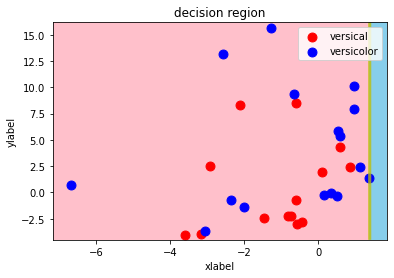

In [603]:
'''
from sklearn.datasets import load_iris
iris = load_iris()
y = iris.target[:100]
X = iris.data[:100,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model.fit(X_train, y_train)
'''
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versical', 'versicolor']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    #plt.scatter(X[model_sc.support_vector, 0],X[model_sc.support_vector, 1], s=80, color='yellow', label='SVM', marker='o') 
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train, model)

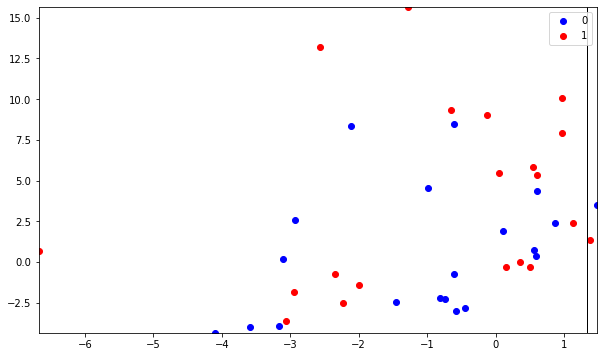

In [604]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.2], linewidths=1, colors='black');

### アドバンスもあるがひとまず必須課題を実施する
### 月曜以降に挑戦する内容
1. 閾値を特徴量分に変更する
2. ゲインの最大化の式を見直す
3. 深さ2以上の課題に取り組む（再帰的課題をクリアする）
→クラス内でクラスを呼び出す